## 3층 신경망 구현하기
* forwarding만 해주는 3층 신경망을 구현해보자.
* 가중치는 고정(학습되지 않음)
* 구조는 아래와 같다.

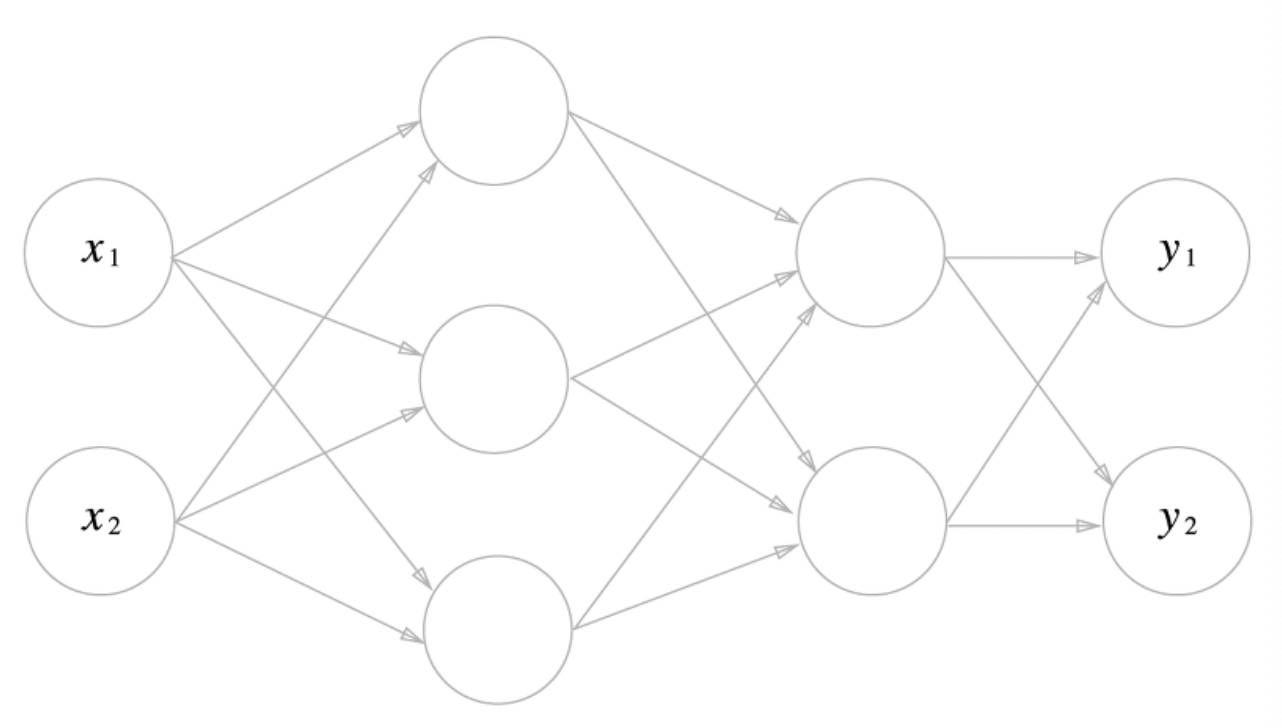

# 3층 신경망 구현하기
* forwarding만 해주는 3층 신경망을 구현.
* 가중치는 학습되지 않고 고정되어 있음.
* 각 hidden layer에 적용되는 activation function은 sigmoid
* output layer는 activation function 없이 값을 흘려보내줌
* 구조는 아래와 같음.

In [240]:
import numpy as np
np.random.seed(777)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def identity(x):
  return x

# input vector는 2차원
def forward_net(input):
  w1 = np.random.rand(2,3)
  w2 = np.random.rand(3,2)
  w3 = np.random.rand(2,2)
  
  hidden1 = sigmoid(np.dot(input, w1))
  hidden2 = sigmoid(np.dot(hidden1, w2))
  output = identity(np.dot(hidden2, w3))

  return output


forward_net([2, 3])

# 예제에서는 추후 class 생성을 대비해 initialize 함수를 따로 만들었다.
# 예제가 더 유지보수에 적합한 것 같다.

array([1.21003633, 0.74475339])

#### Bias가 추가된 경우

In [241]:
import numpy as np
np.random.seed(777)

def sigmoid(x):
  return 1/(1+np.exp(-x))

# input vector는 2차원
def forward_net(input):
  w1 = np.random.rand(2,3)
  w2 = np.random.rand(3,2)
  w3 = np.random.rand(2,2)
  b1 = np.random.rand(3)
  b2 = np.random.rand(2)
  b3 = np.random.rand(2)

  hidden1 = sigmoid(np.dot(input, w1)+b1) 
  hidden2 = sigmoid(np.dot(hidden1, w2)+b2)
  output = identity(np.dot(hidden2, w3)+b3)

  return output


forward_net([2, 3])

array([1.48534159, 1.18935576])

# Softmax 함수 구현

* $y_k = {exp(a_k) \over \sum \limits_{i=1}^n exp(a_i)}$
* softmax함수를 구현한다.
* softmax함수의 overflow 문제를 해결하는 함수 또한 구현한다.

In [242]:
def softmax(inputs):
  denom=0
  for element in inputs:
    denom += np.exp(element)
  
  tmp=[]
  for element in inputs:
    tmp.append(np.exp(element)/denom)
  
  return np.array(tmp)

a=np.array([0.3, 2.9, 4.0]) 
softmax(a)

# 예제에서는 numpy 메소드를 사용해 반복문을 사용하지 않았다.
# 시간복잡도 측면에서 예제가 더 적합하다.

array([0.01821127, 0.24519181, 0.73659691])

In [243]:
#overflow 문제 해결 함수

def softmax(inputs):
  denom=0
  for element in inputs:
    denom += np.exp(element)
  
  max_val=np.max(inputs)
  tmp=[]
  for element in inputs:
    tmp.append(np.exp(element-max_val)/denom)
  
  return np.array(tmp)

softmax(a)

array([0.00033355, 0.00449084, 0.01349124])

# 배치처리

* input layer, hidden layer1, hidden layer2, output layer로 구성되어 있는 모델을 생각해보자.

* 데이터는 mnist dataset을 사용한다고 가정한다.

* input layer는 28x28 image를 flatten한 784개의 픽셀 정보를 받아야 하므로 neuron 개수는 784개이다.

* hidden layer1은 neuron 개수가 50개라고 해보자.

* hidden layer2는 neuron 개수가 100개라고 해보자.

* output layer는 10개의 class를 구분해야 하므로 뉴런이 10개이다.

* network는 가중치가 update되지 않고 forwarding 기능만 한다.

In [244]:
import numpy as np
import tensorflow as tf

#dataset load
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [247]:
# batch처리용 softmax함수 새로 생성
def softmax(inputs):
  tmp=np.zeros((1, inputs.shape[1]))
  for batch in inputs:
    max_val=np.max(batch)
    batch=batch-max_val
    print(batch)
    
    denom=np.sum(np.exp(batch))

    batch=batch/denom
    batch=batch.reshape(1,inputs.shape[1])

    tmp=np.append(tmp, batch, axis=0)
  

  return tmp[1:]

# 행렬의 곱셈을 사용해 for문을 제외한 함수를 추후에 만들었다.
# 위 함수는 for문을 사용했다는 점에 있어 더 비효율적이다.
    


def forward_batch(inputs, batch_size):
  
  n_batch=batch_size
  n_images=inputs.shape[0]

  inputs=inputs.reshape(n_images, -1)
  
  n_input_neurons=inputs.shape[1]
  n_hidden1_neurons=50
  n_hidden2_neurons=100
  n_output_neurons=10

  w1=np.random.rand(n_input_neurons, n_hidden1_neurons)
  w2=np.random.rand(n_hidden1_neurons, n_hidden2_neurons)
  w3=np.random.rand(n_hidden2_neurons, n_output_neurons)

  b1=np.random.rand(n_hidden1_neurons)
  b2=np.random.rand(n_hidden2_neurons)
  b3=np.random.rand(n_output_neurons)

  result=np.zeros((1, 10)) #np.array([])로 빈 array를 만들면 append 불가
  start_index=0
  
  for batch in range(100, n_images+100, n_batch):
    input=inputs[start_index:batch]
    hidden1=sigmoid(np.dot(input, w1)+b1)
    hidden2=sigmoid(np.dot(hidden1, w2)+b2)
    output=softmax(np.dot(hidden2, w3))
    result=np.append(result, output, axis=0)
    break

    start_index += 100

  return result[1:, :]


result = forward_batch(X_train, 100)

[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.         -0.67911084 -3.26335493 -2.88633441 -3.78110371
 -0.40784891 -1.53968579 -2.40719358 -0.47187295]
[-2.01994862  0.

# Chapter3. Loss Function

1) 오차제곱합(SSE, Sums of Squares)

$E = {1 \over 2} \sum \limits_{k} (y_k - t_k)^2$

In [218]:
def SSE(val_pred, val_true):
  result = np.sum((val_pred - val_true)**2) * 1/2
  return result

2)교차 엔트로피 오차(Cross Entropy Error, CEE)

$E = \sum \limits_{k} (t_k log y_k)$

In [219]:
def cross_entropy(val_pred, val_true):
  delta=1e-7
  #delta를 더해줘야 division by zero 오류가 발생 안함.
  result = -np.sum(val_true * np.log(val_pred+delta)) 
  return result

# delta를 더해줘야 하는 것을 책을 보고 참고하였다.
# division by zero 오류를 항상 유의해 함수를 설계하자.

2)미니배치용 cross entropy error

In [220]:
def batch_cross_entropy(val_pred, val_true):
  delta=1e-7
  N = val_pred.shape[0]
  summ=-np.sum(val_true * np.log(val_pred+delta))
  result=np.sum(summ, axis=0) * (-1/N)

  return result

# Chapter 4. 수치 미분(Numerical Difference)

1) Numerical difference

${df(x) \over dx} = lim_{h \rightarrow 0} {f(x+h) - f(x) \over h}$

In [221]:
def numerical_diff(f,x):
  h=1e-4
  result = (f(x+h) - f(x)) / h

  return result

2) Central difference
${df(x) \over dx} = lim_{h \rightarrow 0} {f(x+h) - f(x-h) \over 2h}$

In [222]:
def central_diff(f,x):
  h=1e-4
  result = (f(x+h) - f(x-h)) / (2*h) 

  return result

# 2*h에 괄호를 안 해줬더니 결과가 다르게 나왔다 괄호 꼭 해줄것

3)편미분으로 기울기 구하기
* 편미분을 통해 각 변수별 기울기 벡터를 return하는 함수를 생성한다.
* $f(x) = x_0^2 + x_1^2$이고, $x_0 = 3$, $x_1 = 4$이다.

In [223]:
def gradient(val_x0, val_x1):
  diff_partial_x0=lambda x0: x0**2 + val_x1**2
  diff_partial_x1=lambda x1 : val_x0**2 + x1**2

  tmp1=central_diff(diff_partial_x0, val_x0)
  tmp2=central_diff(diff_partial_x1, val_x1)
  
  return tmp1, tmp2


gradient(3, 4)

#array에 담길 때는 소숫점 첫째 자리에만 담긴다.

(6.00000000000378, 7.999999999999119)

# Chapter5. 경사하강법(Gradient Descent method)

$x_0 = x_0 - \eta {\partial f \over \partial x_0}$


$x_1 = x_1 - \eta {\partial f \over \partial x_1}$

* n_epoch회 가중치 갱신에 대한 함수를 생성한다.

In [224]:
# pos는 x0, x1좌표의 array
def gradient_descent(pos, lr, n_epoch, verbose=True):
  
  pos_x0, pos_x1 = pos
  grad_x0=0
  grad_x1=0
  for i in range(n_epoch):
    grad_x0, grad_x1=gradient(pos_x0, pos_x1)
    
    if verbose==1:
      print('{} iteration gradient : {}'.format(i+1, (grad_x0, grad_x1)))

    pos_x0=pos_x0 - lr * grad_x0
    pos_x1=pos_x1 - lr * grad_x0

  return (pos_x0, pos_x1), (grad_x0, grad_x1)


pos, grad = gradient_descent([3, 4], 0.01, 100)
print('최종 좌표: {}'.format(pos))
print('최종 기울기: {}'.format(grad))

1 iteration gradient : (6.00000000000378, 7.999999999999119)
2 iteration gradient : (5.880000000022534, 7.880000000035636)
3 iteration gradient : (5.762400000008938, 7.762400000004277)
4 iteration gradient : (5.647152000012312, 7.647152000007651)
5 iteration gradient : (5.534208960007447, 7.53420896002055)
6 iteration gradient : (5.423524780816535, 7.423524780811874)
7 iteration gradient : (5.315054285190968, 7.31505428520407)
8 iteration gradient : (5.208753199479332, 7.208753199492435)
9 iteration gradient : (5.1045781354908115, 7.104578135503914)
10 iteration gradient : (5.002486572784903, 7.002486572798006)
11 iteration gradient : (4.902436841334179, 6.902436841329518)
12 iteration gradient : (4.804388104506785, 6.804388104502124)
13 iteration gradient : (4.708300342421978, 6.708300342417317)
14 iteration gradient : (4.614134335572118, 6.6141343355674564)
15 iteration gradient : (4.5218516488532146, 6.521851648857435)
16 iteration gradient : (4.431414615879703, 6.431414615875042)
1

# Chpater 5.Backpropagation

1) 곱셈 layer 구현
* 곱셈 layer의 forward, backward phase를 모두 구현한다.

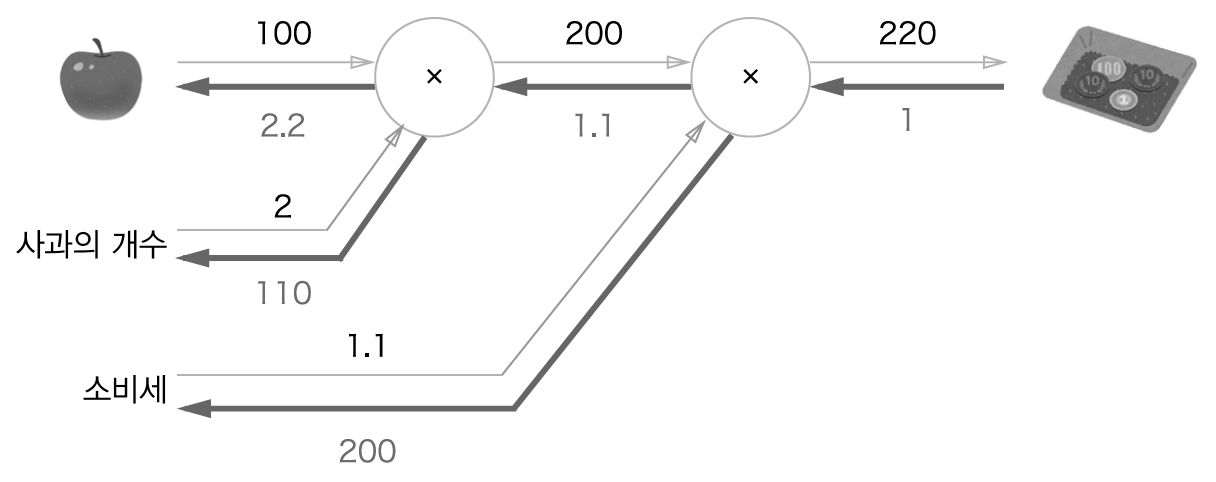

In [225]:
class Mul_layer:
  def __init__(self):
    self.x0=None
    self.x1=None
    self.y=None
    self.dx0=None
    self.dx1=None

  def forward(self, x0, x1):
    self.x0=x0
    self.x1=x1
    self.y=self.x0 * self.x1
    return self.y

  def backward(self, dy):
    self.dx0=dy*self.x1
    self.dx1=dy*self.x0
    return self.dx0, self.dx1

# Mul_layer로 사과 예제 기울기 순전파 실행
p_apple=100
n_apple=2
tax_rate=1.1


total_p_apple=Mul_layer()
price=total_p_apple.forward(p_apple, n_apple)

taxed_p_apple=Mul_layer()
price=int(taxed_p_apple.forward(price, tax_rate))

print('total price is: {}'.format(price))

total price is: 220


In [226]:
# Mul_layer로 사과 예제 기울기 역전파 실행
# dprice=1 이라고 가정

dtotal_p_apple, dtax=taxed_p_apple.backward(1)
dapple, dnum=total_p_apple.backward(dtotal_p_apple)

print('dtotal_p_apple: {}'.format(dtotal_p_apple))
print('dtax: {}'.format(dtax))
print('dapple: {}'.format(dapple))
print('dnum: {}'.format(dnum))

dtotal_p_apple: 1.1
dtax: 200
dapple: 2.2
dnum: 110.00000000000001


2) 덧셈 layer 구현
* forward, backward phase를 모두 수행하는 덧셈 layer를 구현해보자

In [227]:
class Add_layer:
  def __init__(self):
    self.x0=None
    self.x1=None
    self.dx0=None
    self.dx1=None
  
  def forward(self, x0, x1):
    self.x0=x0
    self.x1=x1
    return self.x0+self.x1
  
  def backward(self, dy):
    self.dx0=1*dy
    self.dx1=dy*1

    return self.dx0, self.dx1

3) 덧셈, 곱셈 layer의 활용
* 덧셈, 곱셈 layer를 활용해 아래 계산 그래프를  구현해보자.
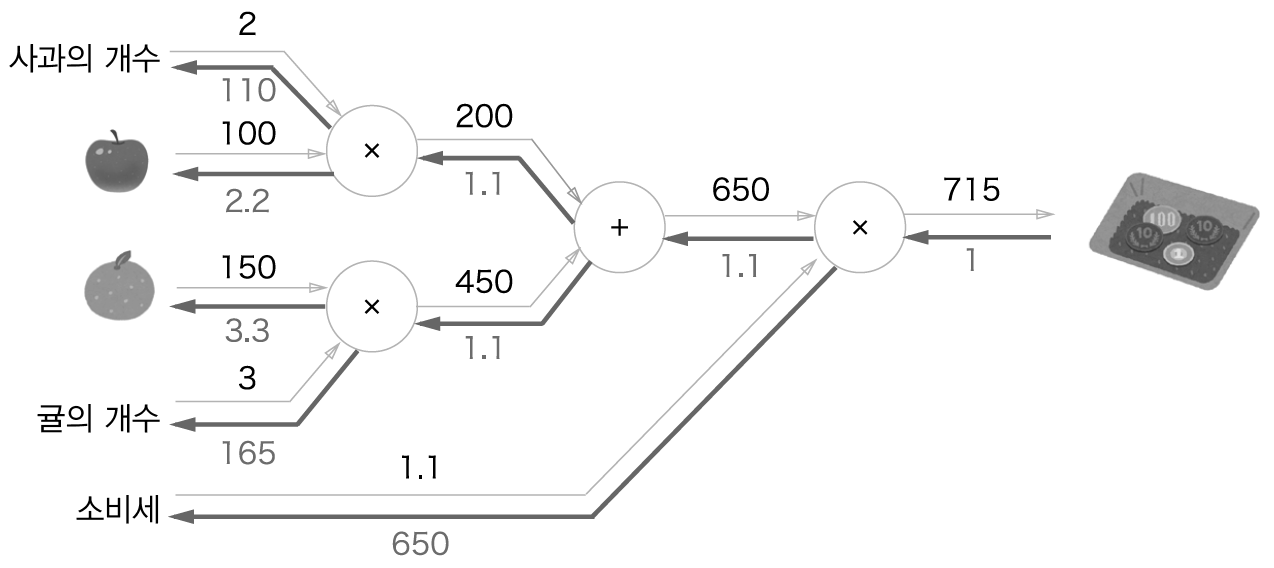

In [228]:
#forward phase로 가격 구하기
n_apple=2
p_apple=100
p_mandarin=150
n_mandarin=3
tax_rate=1.1

#사과 비용
apple_mul=Mul_layer()
apple_out=apple_mul.forward(n_apple, p_apple)

#귤 비용
mandarin_mul=Mul_layer()
mandarin_out=mandarin_mul.forward(p_mandarin, n_mandarin)

#사과+귤 비용
fruits_add=Add_layer()
fruits_out=fruits_add.forward(apple_out, mandarin_out)

#사과+귤 비용(세금포함)
taxed_fruits_mul=Mul_layer()
taxed_fruits_out=taxed_fruits_mul.forward(fruits_out, tax_rate)

print('총 비용: {}'.format(int(taxed_fruits_out)))

총 비용: 715


In [229]:
#backward phase로 기울기 구하기

dfruits_out, dtax=taxed_fruits_mul.backward(1)
dapple_out, dmandarin_out=fruits_add.backward(dfruits_out)
dn_apple, dp_apple=apple_mul.backward(dapple_out)
dp_mandarin, dn_mandarin=mandarin_mul.backward(dmandarin_out) 

print('dfruits_out: {}'.format(dfruits_out))
print('dtax: {}'.format(dtax))
print('dapple_out: {}'.format(dapple_out))
print('dmandarin_out: {}'.format(dmandarin_out))
print('dn_apple: {}'.format(dn_apple))
print('dp_apple: {}'.format(dp_apple))
print('dp_mandarin: {}'.format(dp_mandarin))
print('dn_mandarin: {}'.format(dn_mandarin))

dfruits_out: 1.1
dtax: 650
dapple_out: 1.1
dmandarin_out: 1.1
dn_apple: 110.00000000000001
dp_apple: 2.2
dp_mandarin: 3.3000000000000003
dn_mandarin: 165.0


4) ReLU layer 구현

$y = \begin{cases} x, & \text(x > 0) \\
0, & \text (x \leq 0) \end{cases}$

${\partial y \over \partial x} = \begin{cases} 1, & \text(x > 0) \\
0, & \text (x \leq 0) \end{cases}$



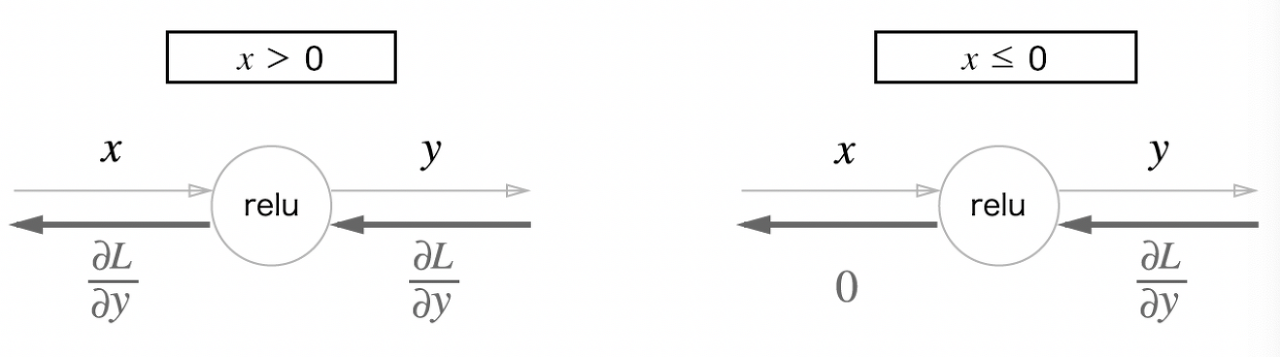

In [230]:
class Relu:
  def __init__(self):
    self.mask=None
  
  def forward(self, x):
    self.mask=(x<=0)
    x[self.mask]=0
    
    return x
  
  def backward(self, dy):
    dy[self.mask]=0
    dx=dy

    return dx

5) Sigmoid layer 구현


In [231]:
class sigmoid:
  def __init__(self):
    self.x=None
    self.y=None
    self.dy=None
    self.ddivide=None
    self.dadd=None
    self.dexp=None
    self.dmul=None

  def forward(self, x):
    self.x=x
    self.y=1/(1+np.exp(-self.x))
    return self.y
  
  def backward(self, dy):
    self.dy=dy
    self.ddivide=-dy*(self.y**2)
    self.dadd=1*self.ddivide
    self.dexp=self.dadd*exp(-self.x)
    self.dmul=-self.dexp
    return self.dmul

6) Affine layer구현

In [232]:
# sigmoid구현 예시를 보니 역전파 과정에 있는 값들을 모두 저장할 필요는 없는 것 같음
# 더 간략하게 구현한다.
class Affine:
  def __init__(self):
    self.x=None
    self.w=None
    self.b=None
    self.y=None
    self.dx=None
    self.dw=None
    self.db=None
  
  def forward(self, x, w, b):
    self.x=x
    self.w=w
    self.b=b
    self.y=np.dot(self.x, self.w)+self.b

    return self.y
  
  def backward(self, dy):
    self.dx=np.dot(dy, np.transpose(self.w))
    self.dw=np.dot(self.x.T, self.y)
    self.db=np.sum(self.y, axis=0)
    return self.dx

7) Softmax-with-Loss layer 구현

In [233]:
class softmax_with_loss:
  def __init__(self):
    self.x=None
    self.y=None
    self.t=None
    self.loss=None
    self.batch_size=None
    self.classes=None
    self.delta=1e-7
  
  def softmax(self, x):
    self.x=x
    self.batch_size=self.x.shape[0]
    self.classes=self.x.shape[1]
    
    max_vals=np.max(self.x, axis=1)
    max_vals=np.repeat(max_vals, 10)
    max_vals=max_vals.reshape(self.batch_size, self.classes)

    exp_x=np.exp(self.x - max_vals)

    denom=exp_x.sum(axis=1)
    denom=np.repeat(denom, 10)
    denom=denom.reshape(self.batch_size, self.classes)

    self.y=np.divide(exp_x, denom)

    return self.y
  
  def batch_cross_entropy(self, t):
    self.t=t
    N = self.batch_size
    summ=-np.sum(self.t * np.log(self.y+self.delta))
    self.L=np.sum(summ, axis=0) * (-1/N)

    return self.L

  def forward(self, x, t):
    self.softmax(x)
    self.batch_cross_entropy(t)
    return self.y, self.L
  
  def backward(self):
    return (self.y - self.t)/self.batch_size

2) 2층 신경망 클래스 구현하기

* 학습 진행 순서 : '미니배치 -> 기울기 산출 -> 매개변수 갱신' 과정을 반복한다.
* 매개변수 갱신엔 SGD를 사용한다.
* 사용할 데이터는 MNIST이다.
* 모델은 input layer, hidden layer1, ouput layer로 구성되어 있다. hidden layer1의 경우 뉴런의 개수는 100개이다.
* hidden layer1의 activation function은 ReLU이다.
* output layer는 softmax_with_loss layer로 구현한다.



In [234]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

#dataset load
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train_categorical=tf.keras.utils.to_categorical(y_train)
X_train=X_train.reshape(60000, -1)
y_test_categorical=tf.keras.utils.to_categorical(y_test)
X_test=X_test.reshape(10000, -1)

In [235]:
class two_layers_NN:
  def __init__(self):
    #initialize weights
    self.w1=np.random.rand(784, 100)
    self.w2=np.random.rand(100, 10)
    self.b1=np.random.rand(100)
    self.b2=np.random.rand(10)
    #initialize layers
    self.affine1_layer=Affine()
    self.relu_layer=Relu()
    self.affine2_layer=Affine()
    self.softmax_with_loss_layer=softmax_with_loss()
    self.daffine2_layer=None
    #initialize inputs and output
    self.x=None
    self.y=None
    self.t=None
    self.L=None
    self.batch_mask=None

    self.dw1=None
    self.db1=None
    self.dw2=None
    self.db2=None

  def batch_sampling(self, x, t, batch_size):
    self.batch_mask=np.random.choice(x.shape[0], batch_size)
    self.x=x[self.batch_mask]
    self.t=t[self.batch_mask]
  
  def forward(self, x, t):

    self.batch_sampling(x, t, 100)
    affine1_out=self.affine1_layer.forward(self.x, self.w1, self.b1)
    relu_out=self.relu_layer.forward(affine1_out)
    affine2_out=self.affine2_layer.forward(relu_out, self.w2, self.b2)
    self.y, self.L=self.softmax_with_loss_layer.forward(affine2_out, self.t)
    
    return self.y


  def backward(self):
    dsoftmax_with_loss=self.softmax_with_loss_layer.backward()
    daffine2_out=self.affine2_layer.backward(dsoftmax_with_loss)
    relu_out=self.relu_layer.backward(daffine2_out)
    self.daffine2_layer=self.affine1_layer.backward(relu_out)
    self.dw1=self.affine1_layer.dw
    self.db1=self.affine1_layer.db
    self.dw2=self.affine2_layer.dw
    self.db2=self.affine2_layer.db

    return self.daffine2_layer


  def training(self, x, t, epochs, batch_size, lr):
    for i in range(epochs):
      self.forward(x, t)
      self.backward()
      self.w1 -= lr * self.dw1
      self.b1 -= lr * self.db1
      self.w2 -= lr * self.dw2
      self.b2 -= lr * self.db2

In [236]:
model=two_layers_NN()
model.training(X_train, y_train_categorical, epochs=100, batch_size=100, lr=0.01)
model.w1

array([[0.93944343, 0.75135914, 0.84864968, ..., 0.34242939, 0.81897507,
        0.04361738],
       [0.89500607, 0.12657642, 0.45818937, ..., 0.31805857, 0.45069844,
        0.93339246],
       [0.88209971, 0.01090578, 0.99904922, ..., 0.29473507, 0.94802276,
        0.85956952],
       ...,
       [0.79609325, 0.3394644 , 0.09287506, ..., 0.82709023, 0.30198541,
        0.29221606],
       [0.20924436, 0.1847087 , 0.66444675, ..., 0.7918198 , 0.06821581,
        0.97071245],
       [0.15461361, 0.56454275, 0.30047969, ..., 0.23716998, 0.37357018,
        0.37658208]])